In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.model_selection as sms
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB

In [371]:
default = pd.read_csv("Default.csv")

In [372]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [373]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [374]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


<Axes: xlabel='student', ylabel='balance'>

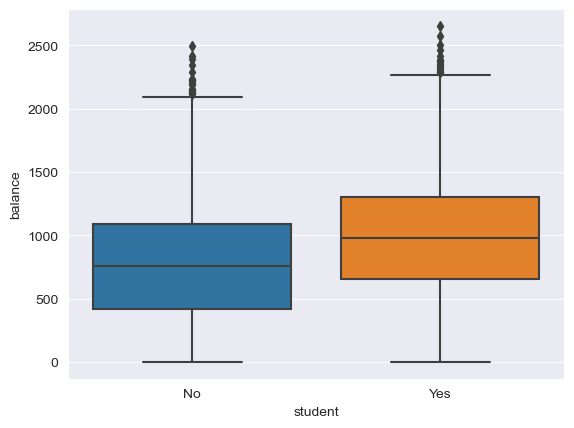

In [375]:
sns.boxplot(x="student",y="balance", data=default)

In [376]:
x_train,x_test,y_train,y_test = sms.train_test_split(default.drop("default",axis=1),default["default"],test_size=0.2)

In [377]:
x_train[["balance","income"]] = StandardScaler().fit_transform(x_train[["balance","income"]])
x_train["student"]=pd.get_dummies(x_train["student"],prefix="student",drop_first=True)
x_train

,student,balance,income
7332,True,0.481423,-1.255308
5067,False,-1.248140,0.192691
5723,True,-0.122887,-1.373893
3039,False,-0.281011,-0.280455
2304,False,-0.184140,0.112707
...,...,...,...
112,False,-1.726285,1.057641
2817,False,1.178187,0.455173
6526,True,-0.410609,-1.135333
1967,True,-0.085139,-0.911212


In [378]:
x_test[["balance","income"]] = StandardScaler().fit_transform(x_test[["balance","income"]])
x_test["student"]=pd.get_dummies(x_test["student"],prefix="student",drop_first=True)
x_test

,student,balance,income
7352,False,1.873790,0.803028
1799,False,-1.538218,0.732284
9033,True,1.514786,-1.395182
578,False,1.413518,0.272063
2570,True,-0.053537,-1.182359
...,...,...,...
2452,False,-1.730504,0.613049
4836,False,0.887893,0.656795
3043,False,1.048805,0.068246
3682,True,-0.078348,-1.284915


In [379]:
reg=slm.LogisticRegression().fit(x_train,y_train)
confusion_matrix = sm.confusion_matrix(y_test, reg.predict(x_test))

TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1]
TN = confusion_matrix[0, 0]
FN = confusion_matrix[1, 0]

total = TP + TN + FP + FN
error_rate = (FP + FN) / total * 100
accuracy = (TP + TN) / total * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print(f"Error Rate: {error_rate:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

confusion_matrix = pd.DataFrame(confusion_matrix,index=["No","Yes"],columns=["No","Yes"]).transpose()

confusion_matrix

Error Rate: 2.50%
Accuracy: 97.50%
Precision: 77.42%
Recall: 35.82%


,No,Yes
No,1926,43
Yes,7,24


In [380]:
reg=LDA().fit(x_train,y_train)
confusion_matrix = sm.confusion_matrix(y_test, reg.predict(x_test))

TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1]
TN = confusion_matrix[0, 0]
FN = confusion_matrix[1, 0]



total = TP + TN + FP + FN
error_rate = (FP + FN) / total * 100
accuracy = (TP + TN) / total * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print(f"Error Rate: {error_rate:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

confusion_matrix = pd.DataFrame(confusion_matrix,index=["No","Yes"],columns=["No","Yes"]).transpose()
print(confusion_matrix)

threshold = 0.2
probs = reg.predict_proba(x_test)
predicted = (probs[:, 1] >= threshold).astype(int).astype(str)
predicted[predicted == '0'] = "No"
predicted[predicted == '1'] = "Yes"

confusion_matrix = sm.confusion_matrix(y_test, predicted)

TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1]
TN = confusion_matrix[0, 0]
FN = confusion_matrix[1, 0]

confusion_matrix = pd.DataFrame(confusion_matrix,index=["No","Yes"],columns=["No","Yes"]).transpose()

total = TP + TN + FP + FN
error_rate = (FP + FN) / total * 100
accuracy = (TP + TN) / total * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print("\n")
print(f"Error Rate: {error_rate:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(confusion_matrix)


Error Rate: 2.50%
Accuracy: 97.50%
Precision: 90.48%
Recall: 28.36%
       No  Yes
No   1931   48
Yes     2   19


Error Rate: 3.85%
Accuracy: 96.15%
Precision: 44.19%
Recall: 56.72%
       No  Yes
No   1885   29
Yes    48   38


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[1.0, 0.7761194029850746, 0.5671641791044776, 0.40298507462686567, 0.373134328358209, 0.2835820895522388, 0.19402985074626866, 0.11940298507462686, 0.08955223880597014, 0.04477611940298507, 0.0]
[1.0, 0.060527677185721676, 0.024831867563372995, 0.007242628039317123, 0.0036213140196585617, 0.0010346611484738748, 0.0010346611484738748, 0.0, 0.0, 0.0, 0.0]


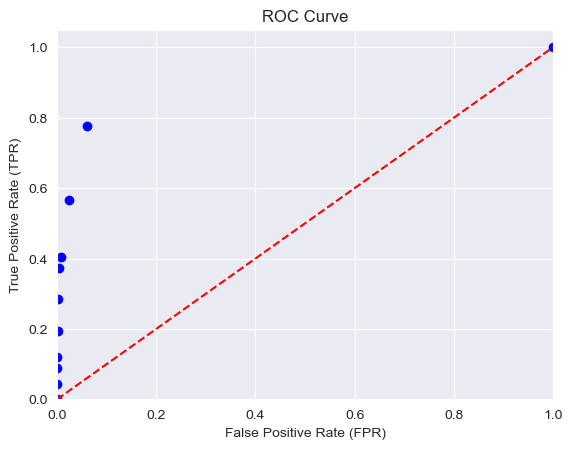

In [381]:
TPR = []
FPR = []
thresholds = np.linspace(0, 1, 11)

for threshold in thresholds:
    probs = reg.predict_proba(x_test)
    predicted = (probs[:, 1] >= threshold).astype(int).astype(str)
    predicted[predicted == '0'] = "No"
    predicted[predicted == '1'] = "Yes"

    confusion_matrix = sm.confusion_matrix(y_test, predicted)
    
    TP = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    TN = confusion_matrix[0, 0]
    FN = confusion_matrix[1, 0]

    TPR.append(TP / (TP + FN))
    FPR.append(FP / (FP + TN))


print(thresholds)
print(TPR)
print(FPR)

plt.figure()
plt.scatter(FPR, TPR, marker='o', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Plotting the diagonal line (random classifier)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()


In [382]:
reg=QDA().fit(x_train,y_train)
confusion_matrix = sm.confusion_matrix(y_test, reg.predict(x_test))

TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1]
TN = confusion_matrix[0, 0]
FN = confusion_matrix[1, 0]


total = TP + TN + FP + FN
error_rate = (FP + FN) / total * 100
accuracy = (TP + TN) / total * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print(f"Error Rate: {error_rate:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

confusion_matrix = pd.DataFrame(confusion_matrix,index=["No","Yes"],columns=["No","Yes"]).transpose()

confusion_matrix

Error Rate: 2.60%
Accuracy: 97.40%
Precision: 77.78%
Recall: 31.34%


,No,Yes
No,1927,46
Yes,6,21


In [383]:
reg = GaussianNB().fit(x_train, y_train)
confusion_matrix = sm.confusion_matrix(y_test, reg.predict(x_test))

TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1]
TN = confusion_matrix[0, 0]
FN = confusion_matrix[1, 0]

total = TP + TN + FP + FN
error_rate = (FP + FN) / total * 100
accuracy = (TP + TN) / total * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print(f"Error Rate: {error_rate:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

confusion_matrix = pd.DataFrame(confusion_matrix,index=["No","Yes"],columns=["No","Yes"]).transpose()
confusion_matrix

Error Rate: 3.20%
Accuracy: 96.80%
Precision: 56.00%
Recall: 20.90%


,No,Yes
No,1922,53
Yes,11,14
